## Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
df=pd.read_csv("churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [4]:
df.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [5]:
df["Int'l Plan"]=df["Int'l Plan"].map({"yes":1, "no":0})
df["VMail Plan"]=df["VMail Plan"].map({"yes":1, "no":0})

In [6]:
df["Churn?"]=df["Churn?"].map({"True.":1, "False.":0})

In [7]:
df.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [8]:
y=df["Churn?"]
X=df.iloc[:,:-1]
X

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,370-3271,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,328-8230,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,364-6381,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [9]:
X= X.drop(columns=["Phone", "State"])
X

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [11]:
model= RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

print("The accuracy is", model.score(X_test, y_test))

The accuracy is 0.9400479616306955


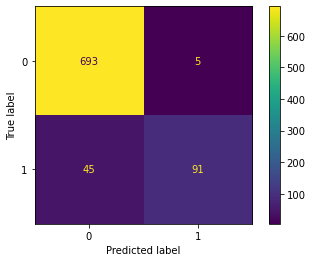

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show() #el modelo predice bien los ceros, mas no los 1

In [13]:
y_hat= model.predict(X_test)

In [14]:
precision_score(y_test, y_hat), recall_score(y_test, y_hat)

(0.9479166666666666, 0.6691176470588235)

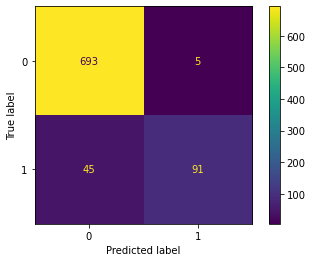

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

In [16]:
!pip install graphviz

In [17]:
from sklearn.tree import plot_tree

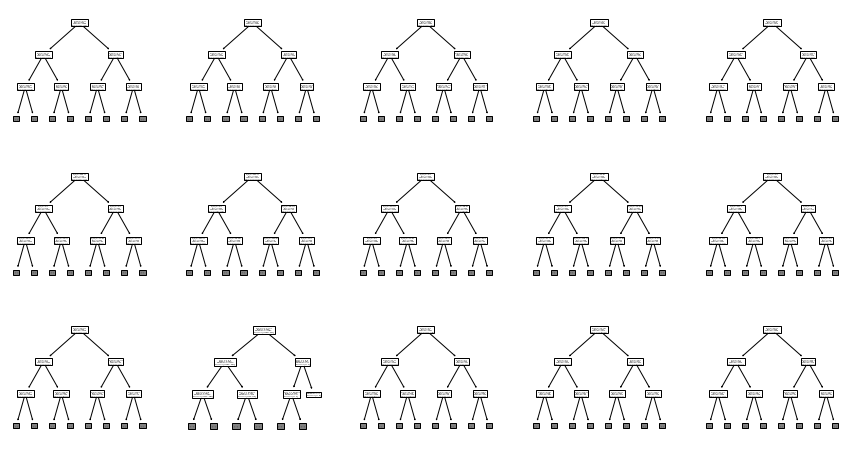

In [18]:
fig, axs= plt.subplots(3,5, figsize=(15,8))
axs= axs.flatten()
for i in range (15):
    tree=model.estimators_[i]
    plot_tree(model.estimators_[i], max_depth=2, ax=axs[i])

In [19]:
trees=np.arange(1,51) #number of trees
accuracy= np.empty(50) #matrix for acc

In [20]:
for i in range(50): #number of modelos
    model= RandomForestClassifier(n_estimators=trees[i]).fit(X_train, y_train)
    accuracy_v=model.score(X_test, y_test)
    accuracy[i]=accuracy_v
print(accuracy)

[0.86330935 0.88729017 0.89808153 0.89808153 0.91007194 0.91486811
 0.92326139 0.91846523 0.93165468 0.93165468 0.93165468 0.9352518
 0.93165468 0.9352518  0.92685851 0.93285372 0.93285372 0.93405276
 0.93764988 0.94004796 0.94244604 0.92925659 0.93165468 0.93045564
 0.93285372 0.92925659 0.93645084 0.93764988 0.93764988 0.93764988
 0.941247   0.93165468 0.941247   0.93405276 0.94724221 0.941247
 0.94244604 0.93884892 0.941247   0.93645084 0.941247   0.94244604
 0.94484412 0.93884892 0.94844125 0.94484412 0.93884892 0.94244604
 0.941247   0.941247  ]


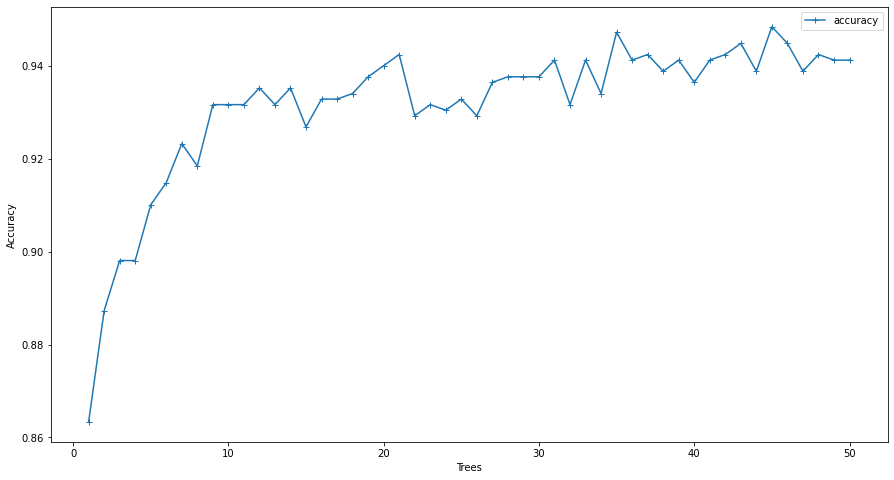

In [21]:
plt.figure(figsize=(15,8))
plt.plot(trees, accuracy, label="accuracy", marker="+")
plt.xlabel("Trees")
plt.ylabel("Accuracy")
plt.legend()
#Hay un punto en el que agregar más árboles puede ser perjudicial. Podría ser a partir de los 30 (aprox.)

In [22]:
accuracy_f=[] #accuracy vs. features
features=len(X_train.columns)
r_features= range(1,features)
for i in r_features:
    model=RandomForestClassifier(max_features=i, n_estimators=33).fit(X_train, y_train) #33 porque es el # de árboles que parece funcionar mejor
    accuracy_f.append(model.score(X_test, y_test))

In [23]:
accuracy_f

[0.8741007194244604,
 0.9088729016786571,
 0.9316546762589928,
 0.9424460431654677,
 0.9460431654676259,
 0.9460431654676259,
 0.9388489208633094,
 0.9376498800959233,
 0.9424460431654677,
 0.9424460431654677,
 0.9424460431654677,
 0.9400479616306955,
 0.9376498800959233,
 0.9388489208633094,
 0.9388489208633094,
 0.9424460431654677,
 0.9364508393285371]

In [24]:
r_features

range(1, 18)

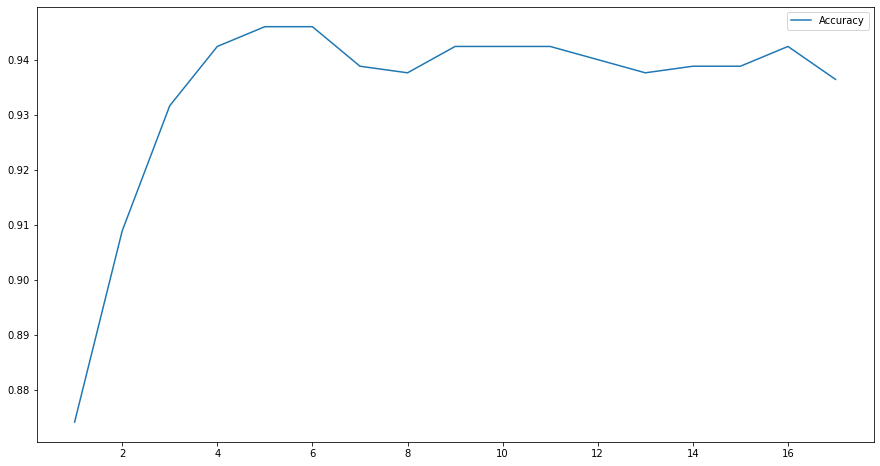

In [25]:
plt.figure(figsize=(15,8))
plt.plot(r_features, accuracy_f, label="Accuracy")
plt.legend()

In [26]:
print("Seis y once podrían ser un buen número de características.")

Seis y once podrían ser un buen número de características.


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
params={"n_estimators": range(30,40,2) , 
        "criterion":["gini", "entropy"],
        "max_depth": list(range(1,3)) + [None], 
        "max_features":["log2", "sqrt"],
        }
model=RandomForestClassifier()
gs= GridSearchCV(model, params, cv=5, n_jobs=1, verbose=1)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


(0.9511783567134268,
 {'criterion': 'gini',
  'max_depth': None,
  'max_features': 'log2',
  'n_estimators': 30})

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression

In [31]:
lir=LinearRegression().fit(X_train, y_train)
lir.score(X_test, y_test)

0.18565343204125617

In [32]:
lor= LogisticRegression(max_iter=100).fit(X_train, y_train)
lor.score(X_test, y_test)

C:\Users\CRAMIREZA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8453237410071942

In [33]:
lor_t= LogisticRegression(max_iter=1000, class_weight="balanced").fit(X_train, y_train)
lor.score(X_test, y_test)

C:\Users\CRAMIREZA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8453237410071942

In [ ]:
#probar árbol de decisión y  k vecinos.

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor().fit(X_train, y_train)
knn.score(X_test, y_test)

0.10738243721557394

In [35]:
lasso=Lasso().fit(X_train, y_train)
lasso.score(X_test, y_test)

0.050948385618174497

In [36]:
print("Se puede concluir que el modelo que cuenta con mejor accuracy es el de Random Forest")

Se puede concluir que el modelo que cuenta con mejor accuracy es el de Random Forest
